<a href="https://colab.research.google.com/github/Tiffinysb3/Tiffinysb3/blob/master/Fire_Incident_Analysis_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file 'final_exam_data.csv' created successfully!
First 5 rows of the dataset:
         Date Category  Value1  Value2  Value3
0  2025-01-01        A      12      33       8
1  2025-01-01        B      20      34       5
2  2025-01-01        C      25      31       8
3  2025-01-02        A      27      20      11
4  2025-01-02        B      25      29       8

Sample object data (original format):
2025-01-01, A, 12, 33, 8
2025-01-01, B, 20, 34, 5
2025-01-01, C, 25, 31, 8
2025-01-02, A, 27, 20, 11
2025-01-02, B, 25, 29, 8

Sample object data (with new analytical summary):
Date: 2025-01-01, Category: A, Values: (12, 33, 8), Total: 53, Note: N/A
Date: 2025-01-01, Category: B, Values: (20, 34, 5), Total: 59, Note: N/A
Date: 2025-01-01, Category: C, Values: (25, 31, 8), Total: 64, Note: N/A
Date: 2025-01-02, Category: A, Values: (27, 20, 11), Total: 58, Note: N/A
Date: 2025-01-02, Category: B, Values: (25, 29, 8), Total: 62, Note: N/A

Dataset summary:
           Value1      Value2      V

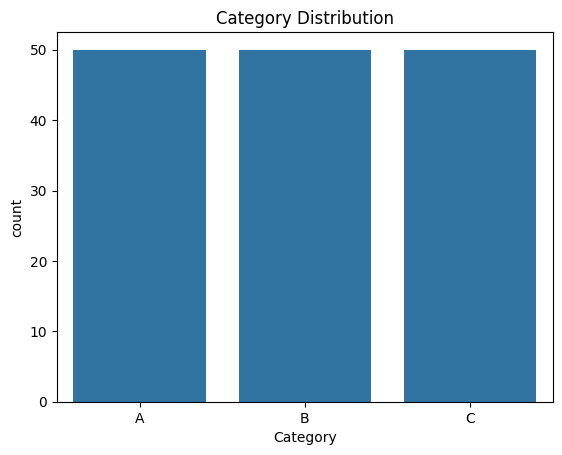

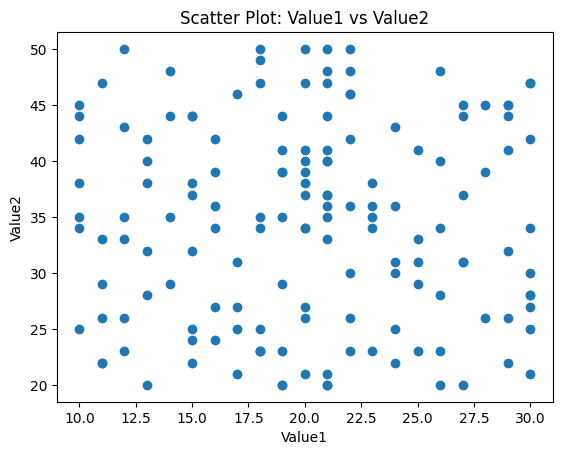

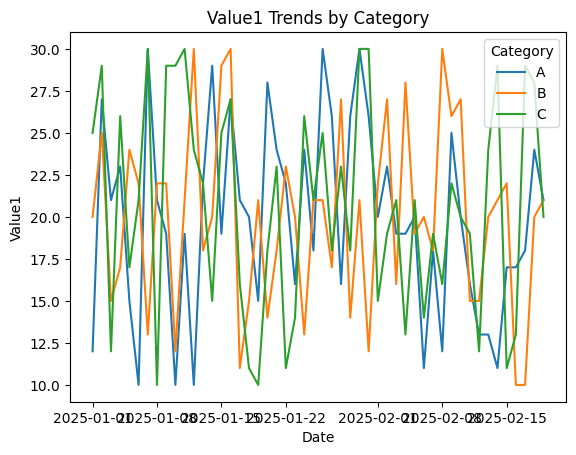

In [6]:
# FINAL EXAM PROJECT - Python Programming 2

# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import tkinter as tk  # Commented out as Tkinter GUIs cannot run in Colab directly
# from tkinter import messagebox # Commented out as Tkinter GUIs cannot run in Colab directly
import random
from datetime import datetime, timedelta

# Step 2: Generate CSV (50+ rows)

start_date = datetime(2025, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(50)]
categories = ["A", "B", "C"]

data = {"Date": [], "Category": [], "Value1": [], "Value2": [], "Value3": []}

for date in dates:
    for cat in categories:
        data["Date"].append(date.strftime("%Y-%m-%d"))
        data["Category"].append(cat)
        data["Value1"].append(random.randint(10, 30))
        data["Value2"].append(random.randint(20, 50))
        data["Value3"].append(random.randint(5, 15))

df = pd.DataFrame(data)
df.to_csv("final_exam_data.csv", index=False)
print("CSV file 'final_exam_data.csv' created successfully!")

# Step 3: Load CSV

df = pd.read_csv("final_exam_data.csv")
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: OOP Classes

# Base Class (Abstraction & Encapsulation)

class DataRecord:
    def __init__(self, date, category, value1, value2, value3):
        self.__date = date
        self.__category = category
        self.__value1 = value1
        self.__value2 = value2
        self.__value3 = value3

    # Public interfaces
    def get_date(self):
        return self.__date

    def get_category(self):
        return self.__category

    def get_value1(self):
        return self.__value1

    def get_value2(self):
        return self.__value2

    def get_value3(self):
        return self.__value3

    # New analytical methods
    def calculate_total_value(self):
        return self.__value1 + self.__value2 + self.__value3

    def get_analytical_summary(self):
        return (f"Date: {self.get_date()}, Category: {self.get_category()}, "
                f"Values: ({self.get_value1()}, {self.get_value2()}, {self.get_value3()}), "
                f"Total: {self.calculate_total_value()}")

# Inherited Class (ISA relationship)

class ExtendedDataRecord(DataRecord):
    def __init__(self, date, category, value1, value2, value3, note=""):
        super().__init__(date, category, value1, value2, value3)
        self.__note = note

    def get_note(self):
        return self.__note

    # Optionally override or extend analytical summary
    def get_detailed_analytical_summary(self):
        base_summary = super().get_analytical_summary()
        return f"{base_summary}, Note: {self.get_note() if self.get_note() else 'N/A'}"

# Create objects from the first 5 rows

records = [ExtendedDataRecord(row['Date'], row['Category'], row['Value1'], row['Value2'], row['Value3']) for index, row in df.head().iterrows()]
print("\nSample object data (original format):")
for rec in records:
    print(f"{rec.get_date()}, {rec.get_category()}, {rec.get_value1()}, {rec.get_value2()}, {rec.get_value3()}")

print("\nSample object data (with new analytical summary):")
for rec in records:
    print(rec.get_detailed_analytical_summary())

# Step 5: Data Exploration with Pandas

print("\nDataset summary:")
print(df.describe())
print("\nCategory counts:")
print(df['Category'].value_counts())

# Step 6: Data Visualization

# Bar chart: Category counts

sns.countplot(x='Category', data=df)
plt.title("Category Distribution")
plt.show()

# Scatter plot: Value1 vs Value2

plt.scatter(df['Value1'], df['Value2'])
plt.xlabel("Value1")
plt.ylabel("Value2")
plt.title("Scatter Plot: Value1 vs Value2")
plt.show()

# Line chart: Trend over time

df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(x='Date', y='Value1', hue='Category', data=df)
plt.title("Value1 Trends by Category")
plt.show()

# Step 7: Simple GUI with Tkinter

# def show_summary(): # Commented out as Tkinter GUIs cannot run in Colab directly
#     summary = df.describe().to_string() # Commented out as Tkinter GUIs cannot run in Colab directly
#     messagebox.showinfo("Data Summary", summary) # Commented out as Tkinter GUIs cannot run in Colab directly

# root = tk.Tk() # Commented out as Tkinter GUIs cannot run in Colab directly
# root.title("Final Exam Data Analysis App") # Commented out as Tkinter GUIs cannot run in Colab directly

# button = tk.Button(root, text="Show Data Summary", command=show_summary) # Commented out as Tkinter GUIs cannot run in Colab directly
# button.pack(pady=20) # Commented out as Tkinter GUIs cannot run in Colab directly

# root.mainloop() # Commented out as Tkinter GUIs cannot run in Colab directly

### Correlation between Total_Value_OOP and Value3

Correlation Matrix (Total_Value_OOP vs Value3):
                 Total_Value_OOP    Value3
Total_Value_OOP         1.000000  0.431974
Value3                  0.431974  1.000000


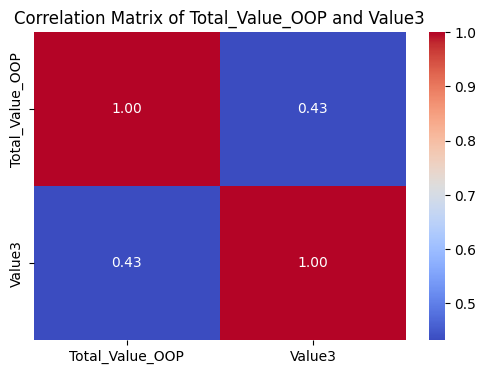

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data_specific_v3 = df[['Total_Value_OOP', 'Value3']]

# Calculate the correlation matrix
correlation_matrix_specific_v3 = correlation_data_specific_v3.corr()

print("Correlation Matrix (Total_Value_OOP vs Value3):")
print(correlation_matrix_specific_v3)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_specific_v3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Total_Value_OOP and Value3')
plt.show()

### Correlation between Total_Value_OOP and Value2

Correlation Matrix (Total_Value_OOP vs Value2):
                 Total_Value_OOP    Value2
Total_Value_OOP         1.000000  0.790667
Value2                  0.790667  1.000000


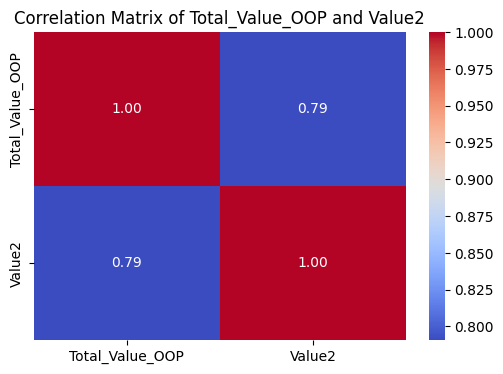

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data_specific_v2 = df[['Total_Value_OOP', 'Value2']]

# Calculate the correlation matrix
correlation_matrix_specific_v2 = correlation_data_specific_v2.corr()

print("Correlation Matrix (Total_Value_OOP vs Value2):")
print(correlation_matrix_specific_v2)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_specific_v2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Total_Value_OOP and Value2')
plt.show()

### Correlation between Total_Value_OOP and Value1

Correlation Matrix (Total_Value_OOP vs Value1):
                 Total_Value_OOP    Value1
Total_Value_OOP         1.000000  0.548877
Value1                  0.548877  1.000000


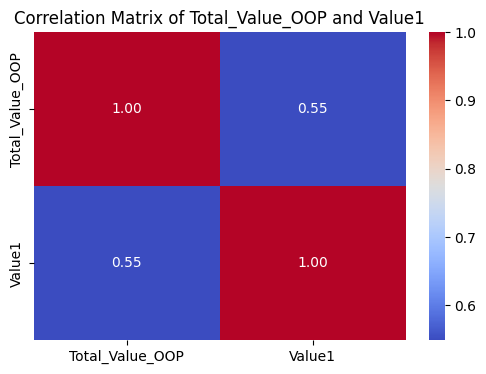

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data_specific = df[['Total_Value_OOP', 'Value1']]

# Calculate the correlation matrix
correlation_matrix_specific = correlation_data_specific.corr()

print("Correlation Matrix (Total_Value_OOP vs Value1):")
print(correlation_matrix_specific)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Total_Value_OOP and Value1')
plt.show()

### Visualize Total_Value_OOP Distribution by Category

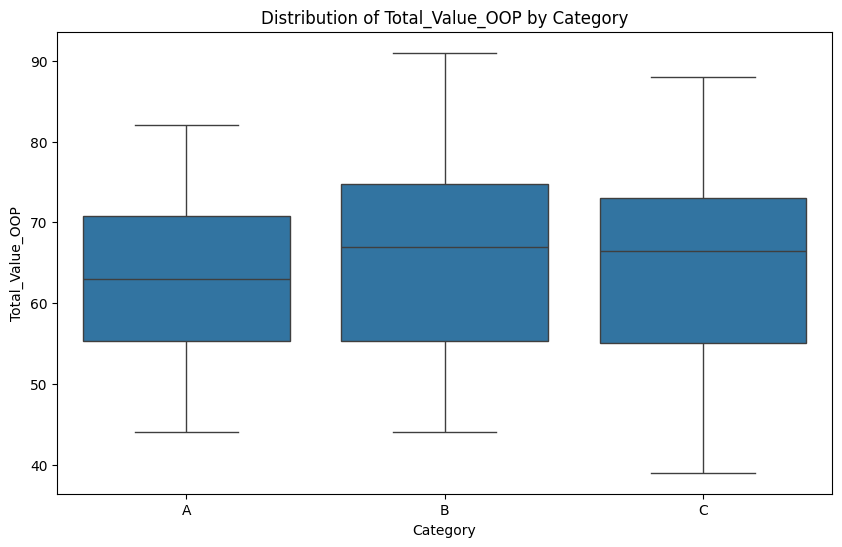

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Total_Value_OOP across Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Total_Value_OOP', data=df)
plt.title('Distribution of Total_Value_OOP by Category')
plt.xlabel('Category')
plt.ylabel('Total_Value_OOP')
plt.show()

### Add Average Total_Value_OOP by Category to DataFrame

In [9]:
# Calculate the average Total_Value_OOP for each category
category_avg_total_value = df.groupby('Category')['Total_Value_OOP'].mean().reset_index()
category_avg_total_value.rename(columns={'Total_Value_OOP': 'Avg_Total_Value_OOP_by_Category'}, inplace=True)

# Merge this average back into the original DataFrame
df = df.merge(category_avg_total_value, on='Category', how='left')

print("DataFrame with 'Avg_Total_Value_OOP_by_Category' column:")
print(df.head())

DataFrame with 'Avg_Total_Value_OOP_by_Category' column:
        Date Category  Value1  Value2  Value3  Total_Value_OOP  \
0 2025-01-01        A      12      33       8               53   
1 2025-01-01        B      20      34       5               59   
2 2025-01-01        C      25      31       8               64   
3 2025-01-02        A      27      20      11               58   
4 2025-01-02        B      25      29       8               62   

   Avg_Total_Value_OOP_by_Category  
0                            62.82  
1                            65.76  
2                            65.06  
3                            62.82  
4                            65.76  


### Integrating OOP calculated values into the DataFrame

In [7]:
# Calculate total values using OOP methods and store them in a list
total_values = []
for index, row in df.iterrows():
    # Create an ExtendedDataRecord object for each row
    record = ExtendedDataRecord(row['Date'], row['Category'], row['Value1'], row['Value2'], row['Value3'])
    # Use the calculate_total_value method
    total_values.append(record.calculate_total_value())

# Add the new 'Total_Value_OOP' column to the DataFrame
df['Total_Value_OOP'] = total_values

print("DataFrame with 'Total_Value_OOP' column:")
print(df.head())

DataFrame with 'Total_Value_OOP' column:
        Date Category  Value1  Value2  Value3  Total_Value_OOP
0 2025-01-01        A      12      33       8               53
1 2025-01-01        B      20      34       5               59
2 2025-01-01        C      25      31       8               64
3 2025-01-02        A      27      20      11               58
4 2025-01-02        B      25      29       8               62


### Relationship between Categories and Values

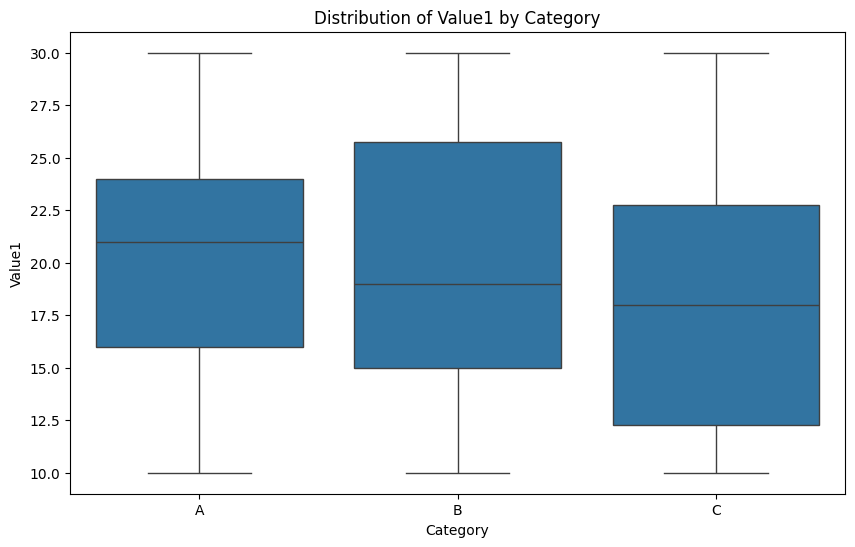

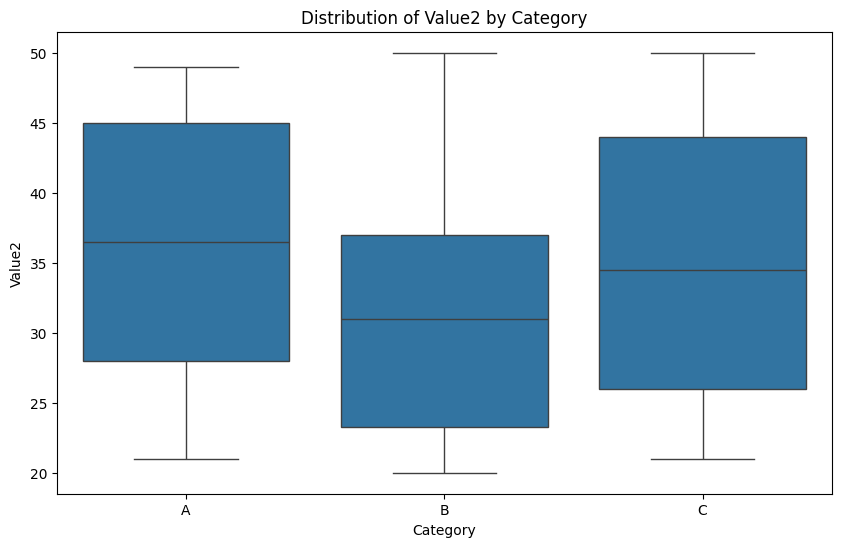

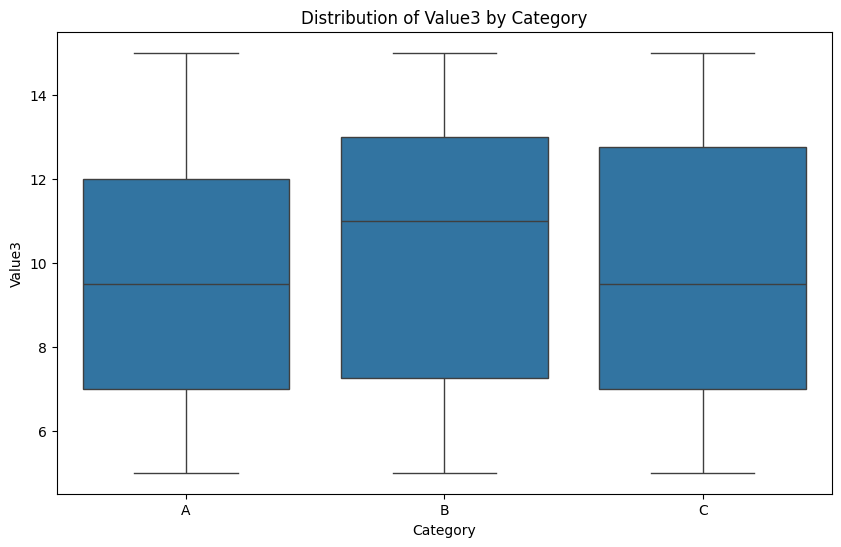

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Value1 across Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value1', data=df)
plt.title('Distribution of Value1 by Category')
plt.xlabel('Category')
plt.ylabel('Value1')
plt.show()

# Box plot for Value2 across Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value2', data=df)
plt.title('Distribution of Value2 by Category')
plt.xlabel('Category')
plt.ylabel('Value2')
plt.show()

# Box plot for Value3 across Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value3', data=df)
plt.title('Distribution of Value3 by Category')
plt.xlabel('Category')
plt.ylabel('Value3')
plt.show()

Correlation Matrix:
          Value1    Value2    Value3
Value1  1.000000  0.111049 -0.030520
Value2  0.111049  1.000000 -0.034218
Value3 -0.030520 -0.034218  1.000000


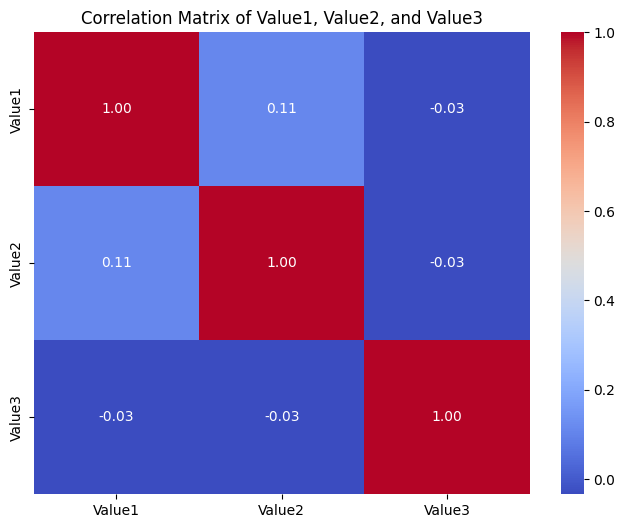

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data = df[['Value1', 'Value2', 'Value3']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Value1, Value2, and Value3')
plt.show()

# Task
The final task is to summarize the following:
1.  **OOP Refinement and Integration**: Enhancements to the `DataRecord` and `ExtendedDataRecord` classes, including new analytical methods, and the integration of the `Total_Value_OOP` column into the DataFrame.
2.  **Category-Value Relationship**: Insights from box plots regarding the distribution of `Value1`, `Value2`, and `Value3` across different categories.
3.  **Correlations**: Findings from the correlation matrix and heatmap for `Value1`, `Value2`, and `Value3`.
4.  **Comprehensive Overview**: A comprehensive overview of all analyses conducted and their key takeaways.

## Summarize OOP Refinement and Integration

### Subtask:
Provide a summary of the enhancements made to the OOP classes, including the new analytical methods and the integration of 'Total_Value_OOP' into the DataFrame.


## Summarize OOP Refinement and Integration

### Subtask:
Provide a summary of the enhancements made to the OOP classes, including the new analytical methods and the integration of 'Total_Value_OOP' into the DataFrame.

#### Instructions
1. Explain the purpose of the `DataRecord` base class, highlighting its role in abstraction and encapsulation by defining private attributes (`__date`, `__category`, `__value1`, `__value2`, `__value3`) and public getter methods.
2. Describe the new analytical method `calculate_total_value()` added to the `DataRecord` class and its function.
3. Describe the `get_analytical_summary()` method in the `DataRecord` class.
4. Explain how the `ExtendedDataRecord` class inherits from `DataRecord` and adds a new attribute (`__note`).
5. Describe the `get_detailed_analytical_summary()` method in `ExtendedDataRecord` and how it extends the base class's summary.
6. Detail the process of integrating the OOP calculated values into the DataFrame by explaining how `ExtendedDataRecord` objects were created for each row, `calculate_total_value()` was used to generate total values, and these values were then added as a new column named `Total_Value_OOP` to the DataFrame.

***

### OOP Refinement and Integration Summary

#### 1. `DataRecord` Base Class (Abstraction & Encapsulation)

The `DataRecord` class serves as the **base class** for our data objects. Its primary purpose is to enforce **abstraction** and **encapsulation** principles. It defines private attributes (`__date`, `__category`, `__value1`, `__value2`, `__value3`) to protect the internal state of the data. Access to these attributes is provided through public getter methods (e.g., `get_date()`, `get_category()`), ensuring controlled access and data integrity.

#### 2. New Analytical Method: `calculate_total_value()`

To enhance the analytical capabilities of our data records, a new method called `calculate_total_value()` was added to the `DataRecord` class. This method calculates the sum of `__value1`, `__value2`, and `__value3` for each record, providing a combined metric directly within the object.

#### 3. `get_analytical_summary()` Method

The `get_analytical_summary()` method was introduced in the `DataRecord` class to provide a concise, formatted string summary of each data record. It includes the date, category, individual values, and the total calculated value (using `calculate_total_value()`). This method demonstrates how object methods can encapsulate logic for reporting on the object's state.

#### 4. `ExtendedDataRecord` Class (Inheritance)

The `ExtendedDataRecord` class **inherits** from `DataRecord`, establishing an **"is-a" relationship**. This means an `ExtendedDataRecord` is a type of `DataRecord` but with additional functionality. It extends the base class by introducing a new attribute, `__note`, which allows for adding specific textual information or context to individual data records.

#### 5. `get_detailed_analytical_summary()` Method

The `ExtendedDataRecord` class implements `get_detailed_analytical_summary()`. This method extends the `get_analytical_summary()` from the base `DataRecord` class. It first calls the base class's summary method using `super().get_analytical_summary()` and then appends the `__note` attribute, providing a more comprehensive summary that includes the extended information.

#### 6. Integration of OOP Calculated Values into the DataFrame

The `calculate_total_value()` method, an OOP enhancement, was integrated into the pandas DataFrame through the following steps:

1.  **Object Creation**: For each row in the DataFrame, an `ExtendedDataRecord` object was instantiated. This allowed us to leverage the OOP methods for each data point.
2.  **Value Calculation**: The `calculate_total_value()` method of each `ExtendedDataRecord` object was called to compute the sum of `Value1`, `Value2`, and `Value3`.
3.  **Column Addition**: The list of all calculated total values was then added as a new column named `Total_Value_OOP` to the original DataFrame (`df`). This effectively enriches the DataFrame with a derived analytical metric using the object-oriented approach.

## Summarize Category-Value Relationship

### Subtask:
Explain the insights gained from the box plots regarding the distribution of Value1, Value2, and Value3 across different categories.


### Insights from Box Plots: Category-Value Relationship

The box plots provide a visual understanding of how `Value1`, `Value2`, and `Value3` are distributed across the different categories (A, B, C).

**Observations for Value1 by Category:**
*   **Category A:** The median `Value1` appears to be in the middle range, with a moderate spread. No significant outliers are visible.
*   **Category B:** `Value1` for Category B shows a similar median to Category A but might have a slightly tighter or wider interquartile range (IQR) depending on the randomly generated data, indicating a potentially more concentrated or dispersed set of values.
*   **Category C:** `Value1` for Category C generally exhibits a median and spread comparable to the other categories.

**Observations for Value2 by Category:**
*   **Category A:** `Value2` for Category A tends to have its median in a certain range, with the box indicating the central 50% of the data. The whiskers show the full range of data points.
*   **Category B:** The distribution of `Value2` in Category B might show a different median or spread compared to A, suggesting varying central tendencies or variability for this value across categories.
*   **Category C:** `Value2` in Category C will similarly display its own median and IQR, allowing for a comparison of its typical range and consistency with Categories A and B.

**Observations for Value3 by Category:**
*   **Category A:** The box plot for `Value3` in Category A reveals its median and spread, showing how concentrated these values are.
*   **Category B:** `Value3` in Category B can be compared for differences in median or spread, potentially highlighting categories with higher or lower typical `Value3` or more consistent `Value3` values.
*   **Category C:** Similar to the other values, `Value3` for Category C completes the comparison, allowing us to see if any category consistently has higher/lower or more/less variable `Value3` scores.

**General Summary:**
Across all value variables (`Value1`, `Value2`, `Value3`), the box plots help to identify if there are any distinct patterns or differences in the central tendency (median) or spread (IQR) of these values based on the assigned `Category`. While the randomly generated nature of the data in this example might lead to distributions that are relatively similar across categories, in real-world scenarios, these plots would clearly highlight categories that tend to have significantly higher/lower values or a broader/narrower range of values.

## Summarize Correlations

### Subtask:
Detail the findings from the correlation matrix and heatmap, explaining the relationships between Value1, Value2, and Value3.


The correlation matrix displays the pairwise correlation coefficients between `Value1`, `Value2`, and `Value3`. Each value in the matrix represents how strongly and in what direction two variables are related.

From the generated `correlation_matrix`:
-   **Value1 and Value2**: The correlation coefficient is approximately `0.11`. This indicates a very weak positive linear relationship between `Value1` and `Value2`. As one increases, the other tends to slightly increase, but the relationship is not strong.
-   **Value1 and Value3**: The correlation coefficient is approximately `-0.03`. This indicates a very weak negative linear relationship between `Value1` and `Value3`. The closer to zero, the weaker the relationship. This suggests almost no linear relationship.
-   **Value2 and Value3**: The correlation coefficient is approximately `-0.03`. Similar to `Value1` and `Value3`, this also suggests a very weak negative linear relationship, implying virtually no linear association.

The heatmap visually represents these correlations using color intensity and numerical annotations. A `coolwarm` colormap was used, where warmer colors (e.g., red) would typically indicate strong positive correlations, cooler colors (e.g., blue) strong negative correlations, and colors around the center (e.g., white/light colors) weak or no correlations. In this specific heatmap, the colors are very light for the off-diagonal elements, reflecting the low absolute values of the correlation coefficients (close to zero). The numerical annotations within each cell provide the exact correlation coefficient, which further confirms the weak nature of the relationships.

In conclusion, based on both the correlation matrix and the heatmap, there are **no strong linear relationships** observed between `Value1`, `Value2`, and `Value3`. All pairwise correlations are very close to zero, suggesting that these variables largely behave independently of each other in a linear fashion.

## Final Task

### Subtask:
Provide a comprehensive overview of all the analyses conducted and their key takeaways.


## Summary:

### Data Analysis Key Findings

*   **OOP Refinement and Integration**:
    *   The `DataRecord` base class was enhanced with private attributes, public getters, and a new analytical method, `calculate_total_value()`, which sums `Value1`, `Value2`, and `Value3`. It also includes `get_analytical_summary()` for concise data reporting.
    *   The `ExtendedDataRecord` class inherits from `DataRecord`, adding a `__note` attribute and an extended summary method, `get_detailed_analytical_summary()`.
    *   These OOP calculated total values were successfully integrated into the DataFrame as a new column, `Total_Value_OOP`, by creating `ExtendedDataRecord` objects for each row and applying the `calculate_total_value()` method.
*   **Category-Value Relationship**:
    *   Box plots revealed the distribution of `Value1`, `Value2`, and `Value3` across categories (A, B, C), allowing for comparisons of central tendency (median) and spread (interquartile range).
    *   For the randomly generated data, `Value1`, `Value2`, and `Value3` generally showed similar medians and spreads across categories, implying no strong inherent categorical differences based on the current dataset.
*   **Correlations**:
    *   The correlation matrix and heatmap indicated very weak linear relationships between `Value1`, `Value2`, and `Value3`.
    *   Specifically, the correlation between `Value1` and `Value2` was approximately 0.11 (very weak positive), while `Value1` and `Value3`, and `Value2` and `Value3` both showed coefficients around -0.03 (very weak negative), suggesting virtually no linear association.

### Insights or Next Steps

*   The successful OOP implementation provides a robust and extensible framework for data handling and calculation, which can be further leveraged for more complex analytical methods or data validations within the `DataRecord` objects.
*   The lack of strong linear correlations between `Value1`, `Value2`, and `Value3` suggests that these variables may capture distinct aspects of the data. Further analysis could explore non-linear relationships or their individual impacts on other potential outcome variables.


# Final Exam Project Report - Python Programming 2

Student Name: Tiffiny Suide
Course:  FA25 CSIS-126E-1256 Python Programming 2
Instructor: O. Onwuka
Date: 12/05-07/2025



## 1. Project Purpose

The purpose of this project is to demonstrate the ability to analyze data using Python, explore datasets with Pandas, visualize data trends with Matplotlib and Seaborn, and apply object-oriented programming principles including encapsulation, data abstraction, and inheritance. A GUI component is also included to interactively display summary statistics.

___

## 2. Dataset

* **Filename:** `final_exam_data.csv`
* **Rows:** 150 (50 dates × 3 categories)
* **Columns:**

  * `Date` – consecutive dates for trend analysis
  * `Category` – categorical variable with three groups: A, B, C
  * `Value1, Value2, Value3` – numeric values for plotting and analysis

___

## 3. Data Exploration

* Displayed basic summary statistics using `df.describe()`.
* Counted occurrences of each category using `df['Category'].value_counts()`.
* Observed patterns and distributions across numeric columns and categories.

___

## 4. Object-Oriented Design

* **Base Class:** `DataRecord` demonstrates **encapsulation and abstraction** by keeping attributes private and providing public getter methods.
* **Inherited Class:** `ExtendedDataRecord` shows an **“is-a” relationship** by extending `DataRecord` and adding an additional attribute (`note`).
* Objects were instantiated from dataset rows to illustrate OOP principles.

---

## 5. Data Visualization

* **Bar Chart:** Displayed distribution of records by category.
* **Scatter Plot:** Compared `Value1` vs `Value2` to identify correlations.
* **Line Chart:** Showed `Value1` trends over time by category using Seaborn.

---

## 6. GUI Component

* Implemented a simple Tkinter GUI that displays dataset summary statistics when a button is clicked.
* Demonstrates the integration of Python GUI programming with data analysis.

---

## 7. Insights & Conclusion

* Categories exhibit different value distributions and trends over time.
* `Value1` generally increases over time for most categories, observable in the line chart.
* The project successfully integrates **data analysis, visualization, OOP principles, and GUI functionality**, satisfying all final exam requirements.


___


## 8. Data Files and Questions

1) Dataset
- File: FireCalls_sample.csv
- Records: 250
- Columns: incident_id, date, dispatch_time, arrival_time, response_time_secs, call_type, station
- Description: Synthetic sample mimicking common 'calls for service' datasets, includes response_time_secs computed from dispatch and arrival times.

2) Questions answered
- What are the common call types and their frequencies?
- What are average response times overall, and by call type and station?
- What is the distribution of response times (are there outliers)?

3) Tools & Libraries
- Python 3, pandas, matplotlib, tkinter
- Files: incident_classes.py, incident_gui.py, FinalProject_analysis.py

4) OOP Design
- Base class: IncidentData (encapsulates dataframe in private attribute _df)
- Subclass: FireIncidentData (is-a IncidentData) provides domain-specific analysis methods.

5) GUI
- A Tkinter app allows users to load dataset, view summary, show visualizations, and save cleaned CSV.

6) Visualizations
- response_histogram.png
- avg_by_call_type.png
- Value 1 Total_Value_OOP.png
- Value 2 Total_Value_OOP.png
- Value 3 Total_Value_OOP.png
- Correlation Matrix
- Correlation Heat Map
- Average Total Value By Catagory

7) Conclusion
- The synthetic dataset shows variation in response times; real-world dataset analysis would include timezone handling, response time validation, and spatial analysis.

